In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd

from citipy import citipy
from datetime import datetime
from config import api_key


In [2]:
#13 thousand cities from:
#https://simplemaps.com/data/world-cities

cities_df = pd.read_csv("worldcities.csv")
cities_df.head()


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592
4,Viti,Viti,42.3214,21.3583,Kosovo,XK,XKS,Viti,admin,NaN,1901328795


In [9]:
# choose a random number to stratify the sample
import random
r =  random.randint(0,10)
r

9

In [10]:
# stratify the city list to return 600 cities
rand_cities = []
coordinates = []

for i in range(600):
    
    j=i*20+r
    
    rand_cities.append(cities_df.iloc[j,0])
    lat = cities_df.iloc[j,2]
    lon = cities_df.iloc[j,3]
    coordinates.append((lat,lon))

#print(rand_cities)


In [11]:
# information for open weather
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [12]:
#response = requests.get(query_url + "London").json()
#response

In [13]:
# set up lists to hold reponse info
lat = []
temp = []
name = []
humid = []
wind = []
clouds = []
i = 1

# Set date for API call
todays_date = datetime.now()
date_of_api = todays_date.strftime("%d %b %Y")
date_of_api


# Loop through the list of cities and perform a request for data on each
for city in rand_cities:
    print(f"Finding record number {i}: {city}")
    try:        
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        name.append(city)
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
    except:
        print(f"City not found...")
    i = i+1


Finding record number 1: Podujevë
City not found...
Finding record number 2: Ferizaj
City not found...
Finding record number 3: Dhamar
Finding record number 4: Rustenburg
Finding record number 5: Vanhynsdorp
City not found...
Finding record number 6: Colesberg
Finding record number 7: Ladysmith
Finding record number 8: Mufulira
Finding record number 9: Chinsali
Finding record number 10: Masvingo
Finding record number 11: Shemonaikha
Finding record number 12: Shieli
Finding record number 13: Qaraghandy
Finding record number 14: Temirtau
Finding record number 15: Shymkent
Finding record number 16: Champasak
Finding record number 17: Schellenberg
Finding record number 18: Tubmanburg
Finding record number 19: Mohales Hoek
Finding record number 20: Kupiškis
Finding record number 21: Panevežys
City not found...
Finding record number 22: Mersch
Finding record number 23: Ādaži
Finding record number 24: Limbaži
Finding record number 25: Balvi
Finding record number 26: Baldone
Finding record num

Finding record number 218: Ceduna
Finding record number 219: Orange
Finding record number 220: Warwick
Finding record number 221: Horsham
Finding record number 222: Thargomindah
Finding record number 223: Grafton
Finding record number 224: Oranjestad
Finding record number 225: Xaçmaz
Finding record number 226: Lerik
Finding record number 227: Qəbələ
Finding record number 228: Mostar
Finding record number 229: Arlon
Finding record number 230: Sapouy
Finding record number 231: Koupéla
Finding record number 232: Stara Zagora
Finding record number 233: Kirundo
Finding record number 234: Cotonou
Finding record number 235: Viacha
Finding record number 236: Camargo
Finding record number 237: Villa Martin
Finding record number 238: Santo Ângelo
Finding record number 239: Maringá
Finding record number 240: Araranguá
Finding record number 241: Guaira
Finding record number 242: Jardim
Finding record number 243: São Francisco do Sul
Finding record number 244: Codó
Finding record number 245: Óbidos

Finding record number 436: Jackson
Finding record number 437: Laconia
Finding record number 438: North Caldwell
Finding record number 439: Clayton
Finding record number 440: Elizabeth
Finding record number 441: Oradell
Finding record number 442: Absecon
Finding record number 443: Florham Park
Finding record number 444: Palmyra
Finding record number 445: Caldwell
Finding record number 446: Lindenwold
Finding record number 447: Lovington
Finding record number 448: Albuquerque
Finding record number 449: Denver City
Finding record number 450: Vidor
Finding record number 451: Canyon
Finding record number 452: Sinton
Finding record number 453: Atlanta
Finding record number 454: Kirby
Finding record number 455: Port Isabel
Finding record number 456: Leon Valley
Finding record number 457: Gladewater
Finding record number 458: Buda
Finding record number 459: Littlefield
Finding record number 460: Palmview
Finding record number 461: Slaton
Finding record number 462: Progreso
Finding record numbe

In [14]:
# create a data frame from cities, lat, and temp etc


weather_dict = {
    "city": name,
    "lat": lat,
    "temp": temp,
    "humidity": humid,
    "wind speed": wind,
    "clouds": clouds
}


weather_data = pd.DataFrame(weather_dict)
weather_data.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>city</th>\n      <th>lat</th>\n      <th>temp</th>\n      <th>humidity</th>\n      <th>wind speed</th>\n      <th>clouds</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Dhamar</td>\n      <td>14.54</td>\n      <td>68.45</td>\n      <td>75</td>\n      <td>0.34</td>\n      <td>67</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Rustenburg</td>\n      <td>-25.67</td>\n      <td>70.61</td>\n      <td>22</td>\n      <td>4.63</td>\n      <td>35</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Colesberg</td>\n      <td>-30.72</td>\n      <td>57.29</td>\n      <td>28</td>\n      <td>11.52</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Ladysmith</td>\n      <td>-28.55</td>\n      <td>75.47</td>\n      <td>20</td>\n      <td>8.48</td>\n      <td>75</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Mufulira</td>\

In [15]:
bob = weather_data.to_html()
bob.lstrip()


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>city</th>\n      <th>lat</th>\n      <th>temp</th>\n      <th>humidity</th>\n      <th>wind speed</th>\n      <th>clouds</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Dhamar</td>\n      <td>14.54</td>\n      <td>68.45</td>\n      <td>75</td>\n      <td>0.34</td>\n      <td>67</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Rustenburg</td>\n      <td>-25.67</td>\n      <td>70.61</td>\n      <td>22</td>\n      <td>4.63</td>\n      <td>35</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Colesberg</td>\n      <td>-30.72</td>\n      <td>57.29</td>\n      <td>28</td>\n      <td>11.52</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Ladysmith</td>\n      <td>-28.55</td>\n      <td>75.47</td>\n      <td>20</td>\n      <td>8.48</td>\n      <td>75</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Mufulira</td>\

In [23]:
#clean data
weather_data_clean = weather_data.loc[weather_data["humidity"]<=100]
high_wind = weather_data.loc[weather_data["wind speed"]>=20]
high_temp = weather_data.loc[weather_data["temp"]>=95]


print(high_wind)
print(high_temp)

weather_data_clean.count()

               city    lat   temp  humidity  wind speed  clouds
146        Medenine  33.34  76.68        64       25.28      40
180         Ushuaia -54.81  32.16       100       29.97      75
191       Tom Price -22.69  86.00        13       20.80       0
195         Warwick  41.70  74.52        61       24.16      75
236    Medicine Hat  50.04  62.53        25       29.97      75
287            Moca  19.39  90.91        46       20.80      75
351      Port Maria  18.37  87.80        66       21.92      20
423          Groves  29.95  81.41        70       28.86      75
443  Williston Park  40.76  75.45        69       20.80       1
489        Brighton  50.82  57.85       100       21.92      75
547          Lowell  42.63  75.63        50       20.80      90
551          Shelby  48.51  57.15        30       28.86       1
           city    lat   temp  humidity  wind speed  clouds
47   Huatabampo  26.83  97.84        30        3.36       5
51    Ongwediva -17.78  95.00        13        4

city          559
lat           559
temp          559
humidity      559
wind speed    559
clouds        559
dtype: int64

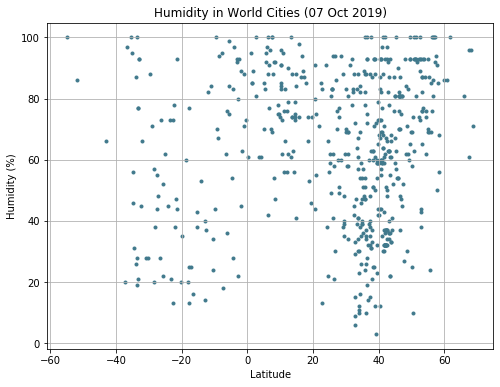

In [17]:
# Build a scatter plot for humidity
plt.figure(figsize=(8,6))
plt.scatter(weather_data_clean["lat"], weather_data_clean["humidity"], marker=".", color = "#40798C")


# Incorporate the other graph properties
plt.title(f"Humidity in World Cities ({date_of_api})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Humidity

There isn't one clear trend with the humidity data however it is interesting to note that there is no city within 10 degrees of the equator that has humidity of less than 30%. There is a range of humidities at almost all latitudes though as you get above a latitude of 40 the humidity appears to increase.

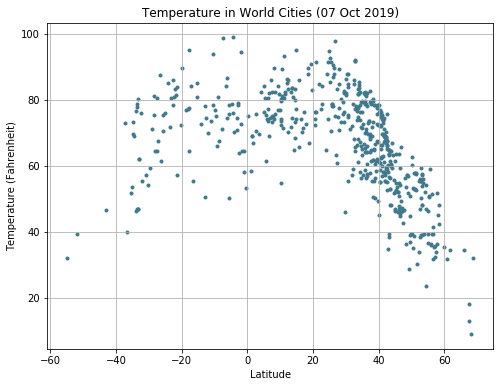

In [18]:
# Build a scatter plot for temperature
plt.figure(figsize=(8,6))
plt.scatter(weather_data_clean["lat"], weather_data_clean["temp"], marker=".", color = "#40798C")

# Incorporate the other graph properties
plt.title(f"Temperature in World Cities ({date_of_api})")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Temperature

From the scatter plot we can see that there is a clear trend of cooler temperatures towards the poles and warmer temeperatures towards the equator. There appears to be a skew towards the north. This may be due to the seasonal change. Though it is autumn in the northern hemisphere the temperatures often lag behind the astronomical seasons. The city with the highest temperature is Medina which has a latitude of 24.47 and the temperature was recorded as 104 F.

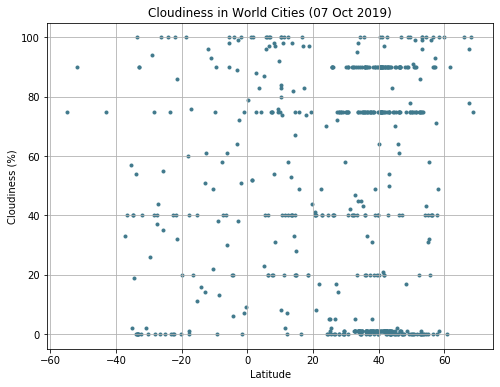

In [19]:
# Build a scatter plot for cloudiness
plt.figure(figsize=(8,6))
plt.scatter(weather_data_clean["lat"], weather_data_clean["clouds"], marker=".", color = "#40798C")

# Incorporate the other graph properties
plt.title(f"Cloudiness in World Cities ({date_of_api})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Cloudiness

The data appears to be clustered here however it is important to note that some of this is due to the measuring techniques. in some regions the cloudiness is measured in oktas or eighths of the sky. This means that some measurements are more likely for example the cluster at 87.5% and 75%. It is notable that there are very few places at the equator with zero cloud. Most places with zero cloud have a latitude of around -20 or between 20 and 60. 

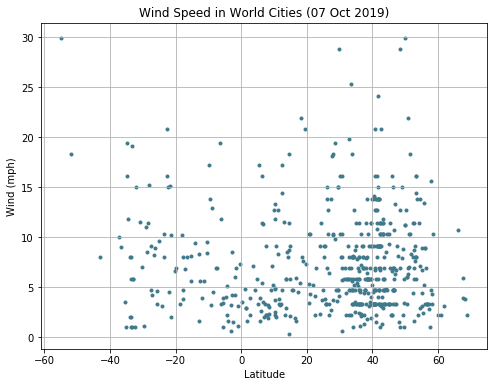

In [20]:
# Build a scatter plot for windspeed
plt.figure(figsize=(8,6))
plt.scatter(weather_data_clean["lat"], weather_data_clean["wind speed"], marker=".", color = "#40798C")

# Incorporate the other graph properties
plt.title(f"Wind Speed in World Cities ({date_of_api})")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

# Show plot
plt.show()

## Wind Speed

In the windspeed data there appears to be some outliers, notably Ushuaia which has a latitude of -54.81 and is considered to be the southern most city in the work. The windspeed is measures as 35.57 mph. This seems quite extreme however this may be expected due to the extreme location. 